In [38]:
import numpy as np
from scipy import stats
from scipy.stats import levene, shapiro, pearsonr, spearmanr

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### T-Test

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups or samples. It is commonly used when you want to compare the means of two populations. T-tests assess whether observed differences between the groups' means are statistically significant or if they could have occurred by chance.

There are several types of t-tests, including:

- **Independent Two-Sample T-Test:** Used when you want to compare the means of two independent groups or samples. It assesses whether the means of the two groups are significantly different.

- **Paired T-Test:** Used when you want to compare the means of paired or matched observations, such as before-and-after measurements from the same individuals.

- **One-Sample T-Test:** Used when you want to determine if the mean of a single sample is significantly different from a known or hypothesized population mean.

The assumptions of a typical independent two-sample t-test (also known as the Student's t-test) are as follows:

- Independence: The observations within each group or sample are independent of each other. In other words, the values in one group do not depend on or affect the values in the other group. Assess independence using correlation analysis (e.g., Pearson's correlation, Spearman correlation). 

- Normality: The data within each group follow a normal distribution. While the t-test is robust to violations of normality, it is most valid when the data are reasonably close to normal. Assess normality using Shapiro-Wilk test for normality. If the normality assumption is violated, you can consider using non-parametric tests like the Mann-Whitney U test.

- Equal Variance (Homogeneity of Variance): The variances within each group are approximately equal. This assumption is known as homoscedasticity. Violations of this assumption can affect the t-test's validity, especially if sample sizes are unequal. Assess equal variances using Levene's test for equal variances. If the equal variance assumption is violated and sample sizes are unequal, use Welch's t-test as it does not assume equal variances.

To determine if the difference is statistically significant, compare the p-value to a significance level (alpha). Generally, a significance level of 0.05 (95% confidence interval) or 0.01 (99% confidence interval) is selected. If the p-value is less than alpha, we reject the null hypothesis, indicating a statistically significant difference. If the p-value is greater than alpha, we fail to reject the null hypothesis, indicating insufficient evidence to conclude that the null hypothesis is false. 

- **Generate Data.**

In [2]:
# Sample data for two groups (e.g., treatment and control groups)
# Set a random seed for reproducibility
np.random.seed(42)

# Generate data for Group 1 (sample size = 5000)
mean_group1 = 50  # Mean of Group 1
std_dev_group1 = 10  # Standard deviation of Group 1
group1 = np.random.normal(mean_group1, std_dev_group1, 5000)

# Generate data for Group 2 (sample size = 5000)
mean_group2 = 55  # Mean of Group 2
std_dev_group2 = 12  # Standard deviation of Group 2
group2 = np.random.normal(mean_group2, std_dev_group2, 5000)

- **Perform Pearson's Correlation and Spearman's Correlation tests to assess independence.**

Correlation is a statistical measure that quantifies the degree and direction of the linear relationship between two continuous variables. Correlations help assess how changes in one variable relate to changes in another variable. Correlation values range from -1 to 1, where:

  - A correlation of 1 indicates a perfect positive linear relationship.
  - A correlation of -1 indicates a perfect negative linear relationship.
  - A correlation close to 0 suggests little to no linear relationship.

**Pearson's Correlation (Pearson's r):** Pearson's correlation coefficient measures the strength and direction of a linear relationship between two continuous variables. It assumes that the data follows a normal distribution, and is sensitive to outliers. It is widely used for variables with a linear relationship and interval or ratio level data.
 
**Spearman's Correlation (Spearman's ρ or Spearman's rank correlation):** Spearman's correlation coefficient assesses the strength and direction of a monotonic (not necessarily linear) relationship between two variables. It does not assume a normality and is less sensitive to outliers. It is suitable for variables with ordinal or non-normally distributed data.

High correlations (positive or negative) between the groups may indicate dependence.

In [3]:
# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(group1, group2)
print(f"Pearson Correlation: {pearson_corr:.2f}")

# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(group1, group2)
print(f"Spearman Correlation: {spearman_corr:.2f}")

Pearson Correlation: -0.00
Spearman Correlation: -0.01


- **Histogram plot to assess normality of distribution.**

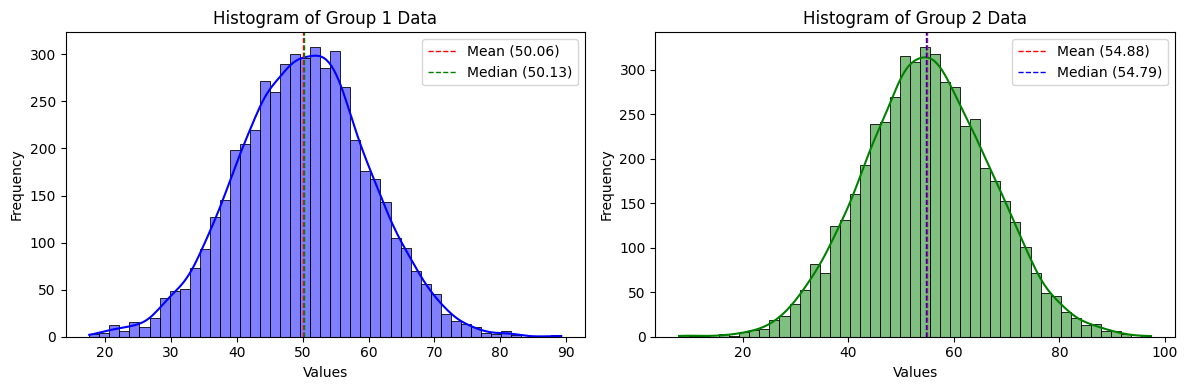

In [43]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(group1, color='blue', kde=True)
plt.title('Histogram of Group 1 Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
mean_group1_value = np.mean(group1)
median_group1_value = np.median(group1)
plt.axvline(x=mean_group1_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_group1_value:.2f})')
plt.axvline(x=median_group1_value, color='green', linestyle='dashed', linewidth=1, label=f'Median ({median_group1_value:.2f})')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(group2, color='green', kde=True)
plt.title('Histogram of Group 2 Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
mean_group2_value = np.mean(group2)
median_group2_value = np.median(group2)
plt.axvline(x=mean_group2_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean ({mean_group2_value:.2f})')
plt.axvline(x=median_group2_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median ({median_group2_value:.2f})')
plt.legend()
plt.tight_layout()
plt.show()


- **Calculate Interquartile Range (IQR) to detect outliers.**

Interquartile Range (IQR) method identifies outliers based on the spread of data between the first quartile (Q1) and the third quartile (Q3). Data points outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) are considered outliers.

In [25]:
# Calculate quartiles
Q1_g1 = np.percentile(group1, 25)
Q3_g1 = np.percentile(group1, 75)

# Calculate IQR (Interquartile Range)
IQR_g1 = Q3_g1 - Q1_g1

# Define lower and upper bounds for outliers
lower_bound_g1 = Q1_g1 - 1.5 * IQR_g1
upper_bound_g1 = Q3_g1 + 1.5 * IQR_g1

# Detect and print outliers
outliers_g1 = np.where((group1 < lower_bound_g1) | (group1 > upper_bound_g1))
print("Group 1 - Outliers detected:\n", group1[outliers_g1])

# Calculate quartiles
Q1_g2 = np.percentile(group2, 25)
Q3_g2 = np.percentile(group2, 75)

# Calculate IQR (Interquartile Range)
IQR_g2 = Q3_g2 - Q1_g2

# Define lower and upper bounds for outliers
lower_bound_g2 = Q1_g1 - 1.5 * IQR_g2
upper_bound_g2 = Q3_g1 + 1.5 * IQR_g2

# Detect and print outliers
outliers_g2 = np.where((group2 < lower_bound_g2) | (group1 > upper_bound_g2))
print("\nGroup 2 - Outliers detected:\n", group2[outliers_g2])

Group 1 - Outliers detected:
 [77.20169167 88.52731491 17.5873266  80.78880808 23.03113357 23.49030192
 21.51457379 21.03744622 21.27737787 20.78649517 81.93107568 22.96767707
 81.37748534 20.59611365 19.80487844 77.59660039 81.09918556 79.49094425
 79.85259003 76.93033664 22.52495157 89.26237706 20.08864029 21.67844402
 20.93011781 78.68403056 20.7055131  82.4309297  81.52056735 22.95608368
 21.60921341 78.14654444 19.9236766  21.45373337 21.62493559 20.8574401
 21.67674075 18.29574264 18.23296187 77.55217744 80.7686037  81.12910201]

Group 2 - Outliers detected:
 [55.7479762  54.97943016 76.67306941 16.34780373 18.46412153 10.7396165
 11.78697875 48.4100927  17.33782401 16.1018341   8.96013342 62.731726
 53.81534927  7.93119698]


- **Boxplot to assess normality of distribution.**

A boxplot (box-and-whisker plot) is used to display the distribution, central tendency, and variability of a dataset. Boxplots help identify central tendency, assess spread and variablity, detect outliers, and check for skewness.

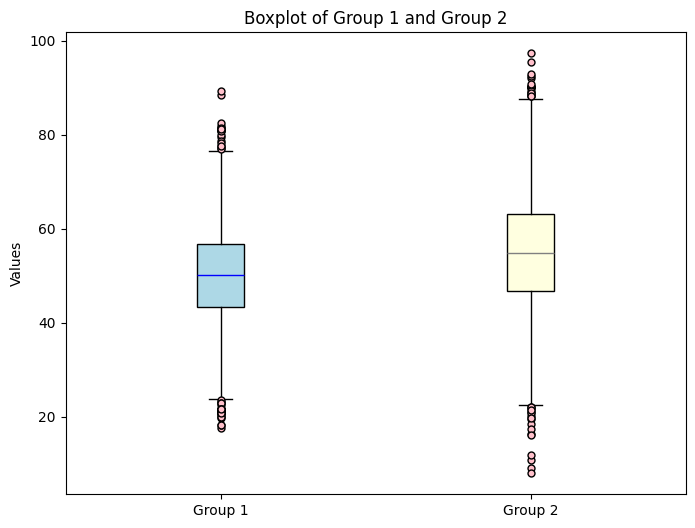

In [33]:
# Create a boxplot for the two groups and specify the color for outliers
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([group1, group2], labels=['Group 1', 'Group 2'], patch_artist=True)

plt.title('Boxplot of Group 1 and Group 2')
plt.ylabel('Values')

# Customize boxplot colors
boxplot['boxes'][0].set_facecolor('lightblue')  # Color for boxes in Group 1
boxplot['boxes'][1].set_facecolor('lightyellow')  # Color for boxes in Group 2
boxplot['medians'][0].set_color('blue')  # Color for medians in Group 1
boxplot['medians'][1].set_color('grey')  # Color for medians in Group 2

# Color outliers (data points beyond whiskers) with a different color
for flier in boxplot['fliers']:
    flier.set(marker='o',markersize=5, markerfacecolor='pink', alpha=1)
    
plt.show()

- **QQPlot to assess normality of distribution.**

A Quantile-Quantile (QQ) plot is a graphical tool used in statistics to assess whether a dataset follows a particular theoretical distribution, typically a normal distribution. QQ Plots provide a visual way to compare the quantiles (ordered data values) of your dataset to the quantiles of a theoretical distribution, such as the standard normal distribution. Deviations from this line indicate differences between your dataset and the theoretical distribution.

- Points above the line indicate that your dataset has higher values in the tails than expected, suggesting heavier tails.
- Points below the line indicate that your dataset has lower values in the tails than expected, suggesting lighter tails.
- S-shaped curves or other patterns can also indicate deviations from the theoretical distribution.

/Users/karie/Projects/terrorism/.venv/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


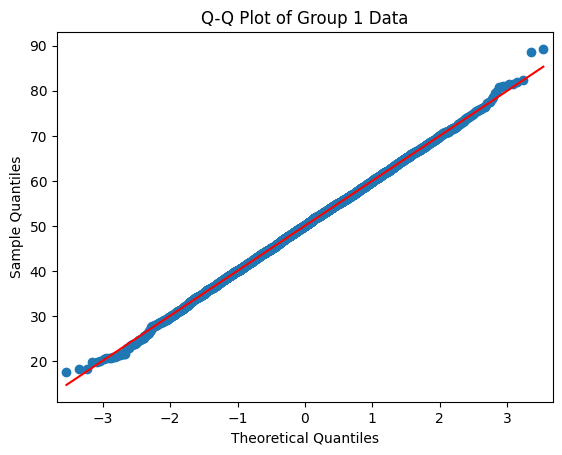

In [8]:
sm.qqplot(group1, line='s', color='blue')
plt.title('Q-Q Plot of Group 1 Data')
plt.show()

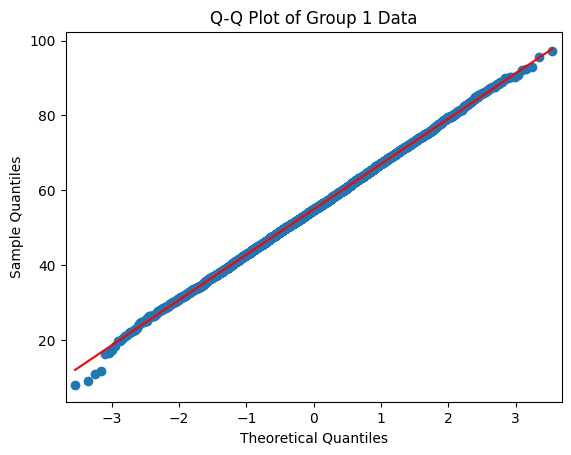

In [9]:
sm.qqplot(group2, line='s')
plt.title('Q-Q Plot of Group 1 Data')
plt.show()

- **Perform Shapiro-Wilk test to assess normality.**

The Shapiro-Wilk test is a statistical test to assess if the data comes from a normally distributed population. A low p-value suggests that the data significantly deviates from normality.


In [5]:
# Calculate Shapiro-Wilk test.
shapiro_test1 = shapiro(group1)
shapiro_test2 = shapiro(group2)

print("Shapiro-Wilk Test for Group 1 Data:")
print("Test Statistic:", shapiro_test1[0])
print("p-value:", shapiro_test1[1])

print("\nShapiro-Wilk Test for Group 2 Data:")
print("Test Statistic:", shapiro_test2[0])
print("p-value:", shapiro_test2[1])

Shapiro-Wilk Test for Group 1 Data:
Test Statistic: 0.9996618032455444
p-value: 0.5906941294670105

Shapiro-Wilk Test for Group 2 Data:
Test Statistic: 0.9997274875640869
p-value: 0.7868857383728027


- **Perform Levene's test for equal variances.**

Levene's test is used to check if the variances of the two groups are approximately equal. A significant p-value suggests unequal variances.


In [4]:
# Calculate Levene's test.
levene_test = levene(group1, group2)

print("Levene's Test for Equal Variances:")
print("Test Statistic:", levene_test[0])
print("p-value:", levene_test[1])

Levene's Test for Equal Variances:
Test Statistic: 161.97818722694439
p-value: 8.068898156166531e-37


- **Perform Independent Samples T-Test to determine significance.**

In [6]:
# Perform an independent two-sample t-test (assuming unequal variances)
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine if the difference is statistically significant (e.g., at a significance level of 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject Null hypothesis: There is a statistically significant difference.")
else:
    print("Fail to reject Null hypothesis: There is no statistically significant difference.")

T-statistic: -21.740925179629887
P-value: 1.9390108296357157e-102
Reject Null hypothesis: There is a statistically significant difference.
